<a href="https://colab.research.google.com/github/iraNklva/Homework-Netology-TSML-9/blob/main/TSML_9_%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B%2C_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Приведение временных рядов к стационарному виду

## 1. Загружаем необходимые библиотеки

In [32]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
%matplotlib inline

## 2. Загружаем данные

In [6]:
sales_of_company_x = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
robberies_in_boston = pd.read_csv('monthly-boston-armed-robberies-j.csv')
airlines_passengers = pd.read_csv('international-airline-passengers.csv')
mean_monthly_temp = pd.read_csv('mean-monthly-air-temperature-deg.csv')
dowjones_closing = pd.read_csv('weekly-closings-of-the-dowjones-.csv')
female_births = pd.read_csv('daily-total-female-births-in-cal.csv')

In [6]:
sales_of_company_x.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


In [7]:
robberies_in_boston.head()

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43


In [8]:
airlines_passengers.head()

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
mean_monthly_temp.head()

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1


In [10]:
dowjones_closing.head()

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


In [11]:
female_births.head()

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


## 3. Визуализируем данные

In [7]:
all_series = {
    'Monthly sales of company X': sales_of_company_x['Count'],
    'Monthly Boston armed robberies': robberies_in_boston['Count'],
    'International airline passengers: monthly totals in thousands': airlines_passengers['Count'],
    'Mean monthly air temperature (Deg. F) Nottingham Castle': mean_monthly_temp['Deg'],
    'Weekly closings of the Dow-Jones industrial average': dowjones_closing['Close'],
    'Daily total female births in California': female_births['Count']
}

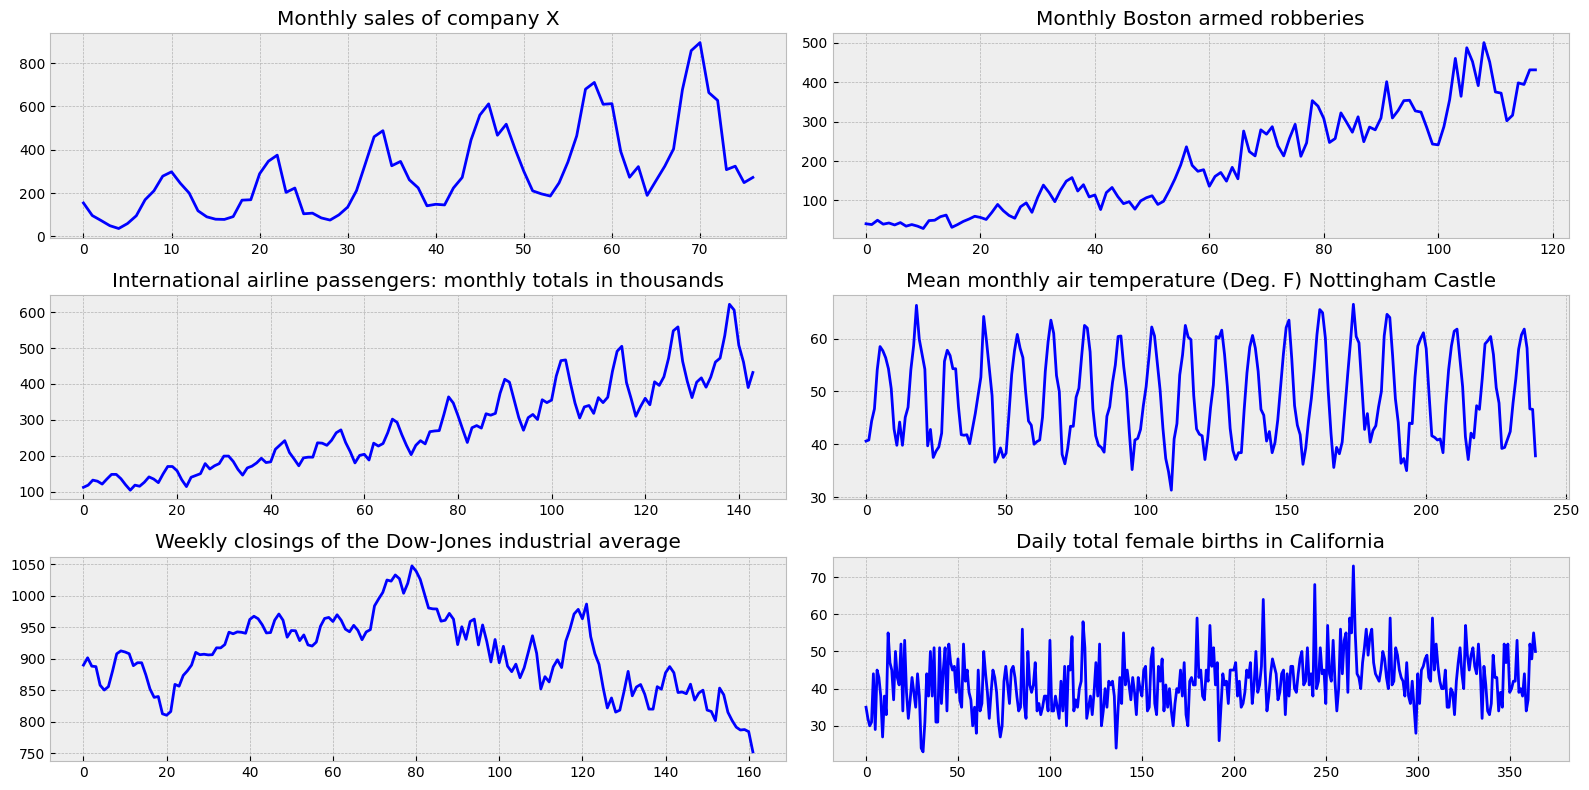

In [15]:
with plt.style.context('bmh'):
    plt.figure(figsize = (16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax = ts_ax, color = 'blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

## 4. Анализ временных рядов

### 4.1 Временной ряд Monthly sales of company X

Визуально можно сказать, что ряд нестационарный, так как виден тренд и сезонность. Проверим предположение с помощью теста Дики-Фуллера

In [3]:
# вспомогательная функция для вывода результатов теста Дики-Фуллера
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [8]:
test_stationarity(all_series['Monthly sales of company X'])

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Видим, что значение p-value > 0.05, следовательно, ряд нестационарный 

Посмотрим на коррелограммы нашего ряда

In [39]:
# вспомогательная функция для вывода коррелограмм
def tsplot(y, lags=None, figsize=(10, 5), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


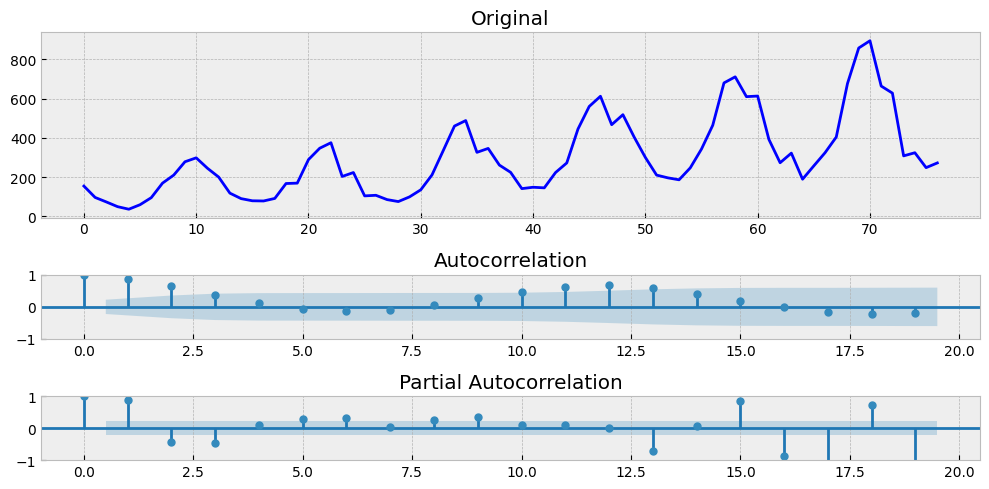

In [40]:
tsplot(all_series['Monthly sales of company X'])

Из графика видно, что дисперсия ряда изменяется во времени. Выполним преобразование Бокса-Кокса

In [17]:
series = boxcox(all_series['Monthly sales of company X'], 0)

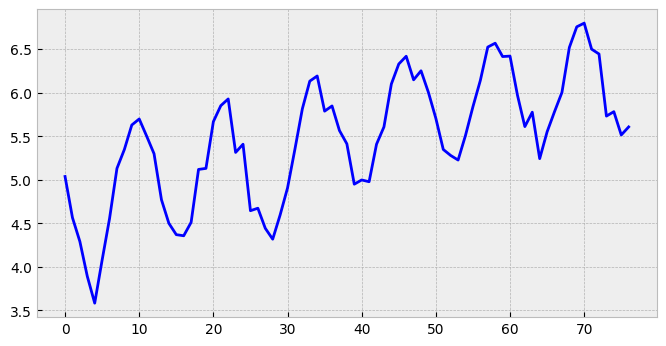

In [18]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series, color='blue')

Далее можно попытаться избавиться от сезонности. Для этого можно провести сезонное дифференцирование. То есть нужно из ряда вычесть этот же ряд, но смещенный на длину периода.

In [21]:
series_1 = series[10:] - series[:-10]

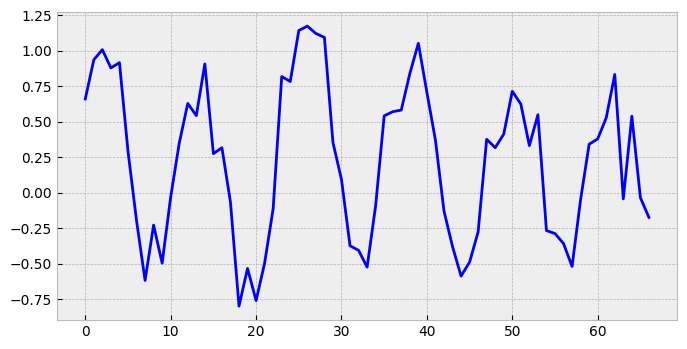

In [22]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series_1, color='blue')

Далее тренд. Чтобы избавиться от него, применяем обычное дифференцирование. И проводим дифференцирование, пока ряд не станет стационарным

In [26]:
series_2 = np.diff(series_1, 1)

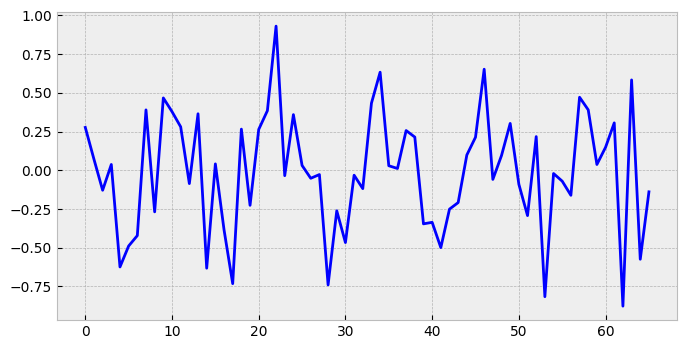

In [27]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series_2, color='blue')

In [28]:
test_stationarity(series_2)

Results of Dickey-Fuller Test:
Test Statistic                 -2.542628
p-value                         0.105444
#Lags Used                     11.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


Видим, что ряд всё еще нестационарный. Продифференцируем еще раз

In [29]:
series_3 = np.diff(series_2, 1)

In [31]:
test_stationarity(series_3)

Results of Dickey-Fuller Test:
Test Statistic                -7.953796e+00
p-value                        3.075588e-12
#Lags Used                     1.100000e+01
Number of Observations Used    5.300000e+01
Critical Value (1%)           -3.560242e+00
Critical Value (5%)           -2.917850e+00
Critical Value (10%)          -2.596796e+00
dtype: float64


Теперь можно сказать, что мы получили стационарный ряд. Точнее, что гипотеза о нестационарности ряда отвергнута

Посмотрим на коррелограммы полученного ряда

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


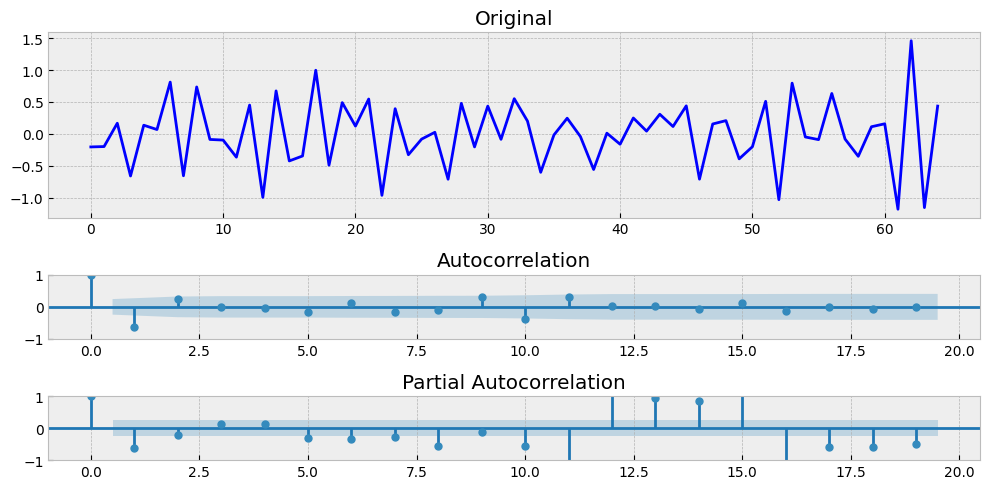

In [41]:
tsplot(series_3)

### 4.2 Временной ряд Monthly Boston armed robberies

У ряда можно отметить наличие тренда и изменяющуюся во времени дисперсию

In [43]:
test_stationarity(all_series['Monthly Boston armed robberies'])

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


Преобразование Бокса-Кокса

In [44]:
series = boxcox(all_series['Monthly Boston armed robberies'], 0)

Дифференцирование

In [45]:
series_1 = np.diff(series, 1)

In [46]:
test_stationarity(series_1)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


Ряд стационарный

### 4.3 Временной ряд International airline passengers: monthly totals in thousands

Данный ряд похож на ряд, рассмотренный в пункте 4.1. Присутствуют те же составляющие: тренд, сезонность, изменяющаяся дисперсия

In [47]:
test_stationarity(all_series['International airline passengers: monthly totals in thousands'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Преобразование Бокса-Кокса

In [48]:
series = boxcox(all_series['International airline passengers: monthly totals in thousands'], 0)

Сезонное дифференцирование

In [49]:
series_1 = series[12:] - series[:-12]

Обычное дифференцирование

In [51]:
series_2 = np.diff(series_1, 1)

In [52]:
test_stationarity(series_2)

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


Ряд стационарный

### 4.4 Временной ряд Mean monthly air temperature (Deg. F) Nottingham Castle

In [53]:
test_stationarity(all_series['Mean monthly air temperature (Deg. F) Nottingham Castle'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


Согласно тесту Дики-Фуллера, данный ряд уже является стационарным, однако на графике видна сезонность, поэтому продифференцируем наш ряд один раз, чтобы получить p-value много меньше 0.05

In [106]:
series = all_series['Mean monthly air temperature (Deg. F) Nottingham Castle']

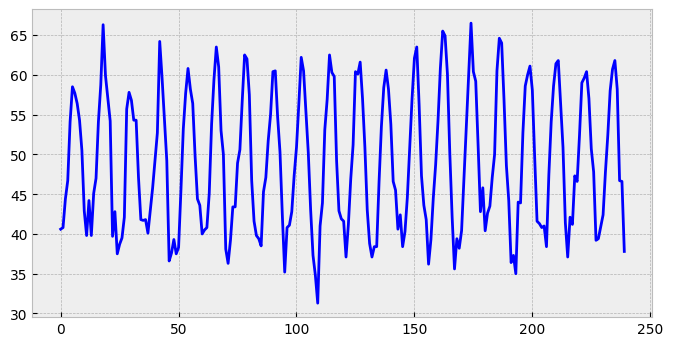

In [59]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series, color='blue')

In [111]:
series_1 = np.diff(series, 2)

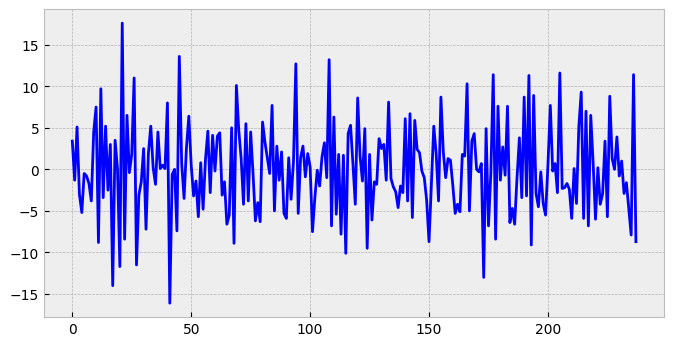

In [112]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series_1, color='blue')

In [113]:
test_stationarity(series_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.041098e+01
p-value                        1.804502e-18
#Lags Used                     1.500000e+01
Number of Observations Used    2.220000e+02
Critical Value (1%)           -3.460154e+00
Critical Value (5%)           -2.874649e+00
Critical Value (10%)          -2.573757e+00
dtype: float64


### 4.5 Временной ряд Weekly closings of the Dow-Jones industrial average

In [86]:
test_stationarity(all_series['Weekly closings of the Dow-Jones industrial average'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


У ряда виден тренд. Продифференцируем

In [87]:
series = np.diff(all_series['Weekly closings of the Dow-Jones industrial average'], 1)

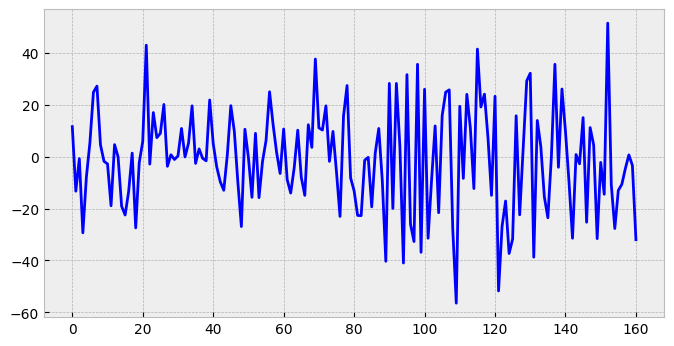

In [88]:
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(series, color='blue')

In [89]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


Ряд стационарный

### 4.6 Временной ряд Daily total female births in California

Визуально можно предположить, что ряд уже сам по себе является стационарным, так как трудно выделить характерные составляющие

In [90]:
test_stationarity(all_series['Daily total female births in California'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
